Imports

In [1]:
from binopi import opifit, opiparams, noisymodel, opiutils, opiplot
import matplotlib.pyplot as plt
from scipy import constants

Import data

In [2]:
exdatapath = '/Users/amblardb/Documents/PhD/Code/Modules/binopi_pkg/refobs/'
exdata = opiutils.importOIFits(exdatapath)

Useful constants

In [3]:
mas = constants.arcsecond/1000
refwave = 2.15e-6   
scale = 'freq'

Define model

In [4]:
model = opiparams.mergeModel(opiparams.ModulatedRing(1), opiparams.PointSource(1))

model.params['vis_modulated_ring;1:FLUX'] = 0.8
model.params['vis_modulated_ring;1:RINGRADIUS'] = 3*mas
model.params['vis_modulated_ring;1:RADIUS'] = 1*mas
model.params['vis_modulated_ring;1:ERATIO'] = 1.3
model.params['vis_modulated_ring;1:POSANG'] = 140*constants.pi/180
model.params['vis_modulated_ring;1:SPI'] = opiutils.teff_to_spi(1500, refwave)

model.params['vis_point_source;1:FLUX'] = 0.2
model.params['vis_point_source;1:OFX'] = 0.02*mas
model.params['vis_modulated_ring;1:SPI'] = opiutils.teff_to_spi(10000, refwave)

model.free['vis_modulated_ring;1:POSANG'] = True
model.free['vis_modulated_ring;1:RINGRADIUS'] = True
model.free['vis_modulated_ring;1:RADIUS'] = True
model.free['vis_modulated_ring;1:ERATIO'] = True
model.free['vis_modulated_ring;1:CM'] = True
model.free['vis_modulated_ring;1:SM'] = True



Generate data

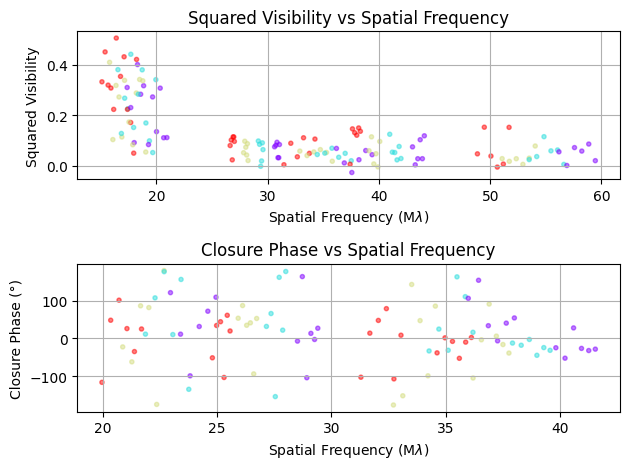

In [5]:
noisydata = noisymodel.noisymodel(model, exdata, noiselevel = 1e-2)

fig = plt.figure()
ax = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
opiplot.plot_vis2(noisydata, ax, scale = scale)
opiplot.plot_t3phi(noisydata, ax2, scale = scale)
plt.tight_layout()
plt.show()

Least squares fit

LS done
{'vis_modulated_ring;1:POSANG': 2.4285796981586243, 'vis_modulated_ring;1:FLUX': 0.8, 'vis_modulated_ring;1:OFX': 0.0, 'vis_modulated_ring;1:OFY': 0.0, 'vis_modulated_ring;1:RADIUS': 4.675385202507376e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4349275118421703e-08, 'vis_modulated_ring;1:ERATIO': 1.2841960541447437, 'vis_modulated_ring;1:FLOR': 0.5, 'vis_modulated_ring;1:MOD': 1, 'vis_modulated_ring;1:CM': [0.28972393250941764], 'vis_modulated_ring;1:SM': [-0.3074163165613216], 'vis_modulated_ring;1:SPI': 1.6283574376766428, 'vis_point_source;1:FLUX': 0.2, 'vis_point_source;1:OFX': 9.696273622190721e-11, 'vis_point_source;1:OFY': 0.5, 'vis_point_source;1:SPI': -1.5}
{'vis_modulated_ring;1:POSANG': 2.4285796981586243, 'vis_modulated_ring;1:FLUX': 0.8, 'vis_modulated_ring;1:OFX': 0.0, 'vis_modulated_ring;1:OFY': 0.0, 'vis_modulated_ring;1:RADIUS': 4.675385202507376e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4349275118421703e-08, 'vis_modulated_ring;1:ERATIO': 1.2841960541447437, 'vi

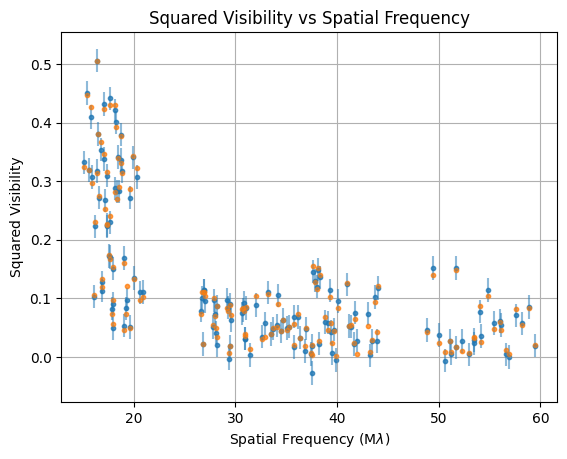

In [6]:
lsmodel, redchisquared = opifit.master_leastSquares(model, noisydata, 100)
print(model.params)
print(lsmodel.params)
lsdata = noisymodel.noisymodel(lsmodel, exdata, noiselevel = 0)

figls = plt.figure()
axls = plt.subplot(1,1,1)
opiplot.plot_vis2(noisydata, axls, type = 'errorbars', scale = scale)
opiplot.plot_vis2(lsdata, axls, type = 'errorbars', scale = scale)
plt.show()


MCMC fit

In [7]:
sampler, mcmc_result, mcmodel, keys = opifit.fit_mcmc(1000, 100, lsmodel, noisydata)

vis_modulated_ring;1:POSANG
vis_modulated_ring;1:RADIUS
vis_modulated_ring;1:RINGRADIUS
vis_modulated_ring;1:ERATIO
vis_modulated_ring;1:CM
vis_modulated_ring;1:SM


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/amblardb/Documents/PhD/Code/Modules/binopi_pkg/.venv/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [01:05<00:00, 15.32it/s]


Generate fit report

2.4351547011919337 0
4.6437802485325456e-09 -9
1.4358599297101426e-08 -8
1.2847373969668898 0
0.28946098703060946 -1
-0.3008165172983146 -1


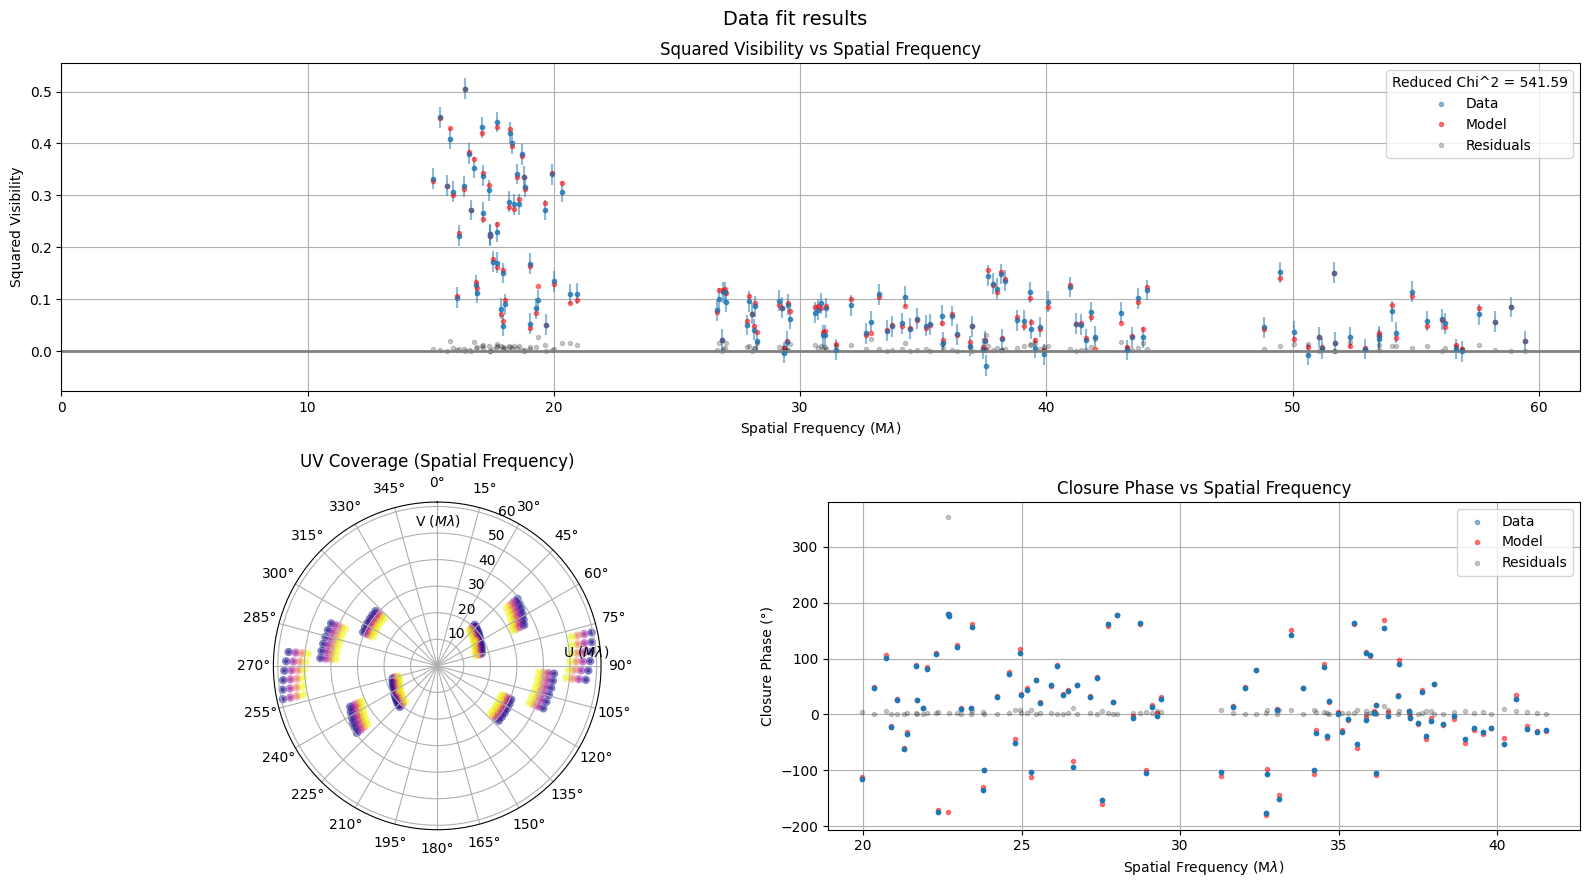

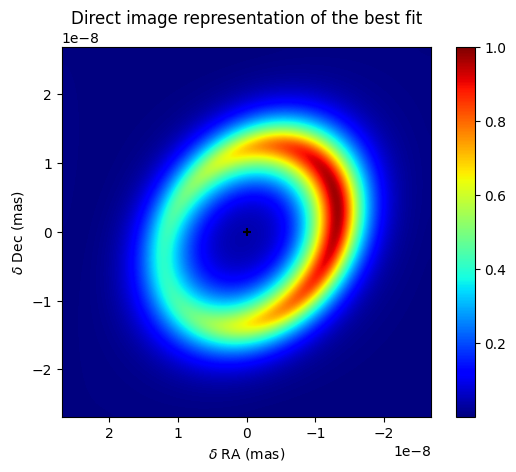

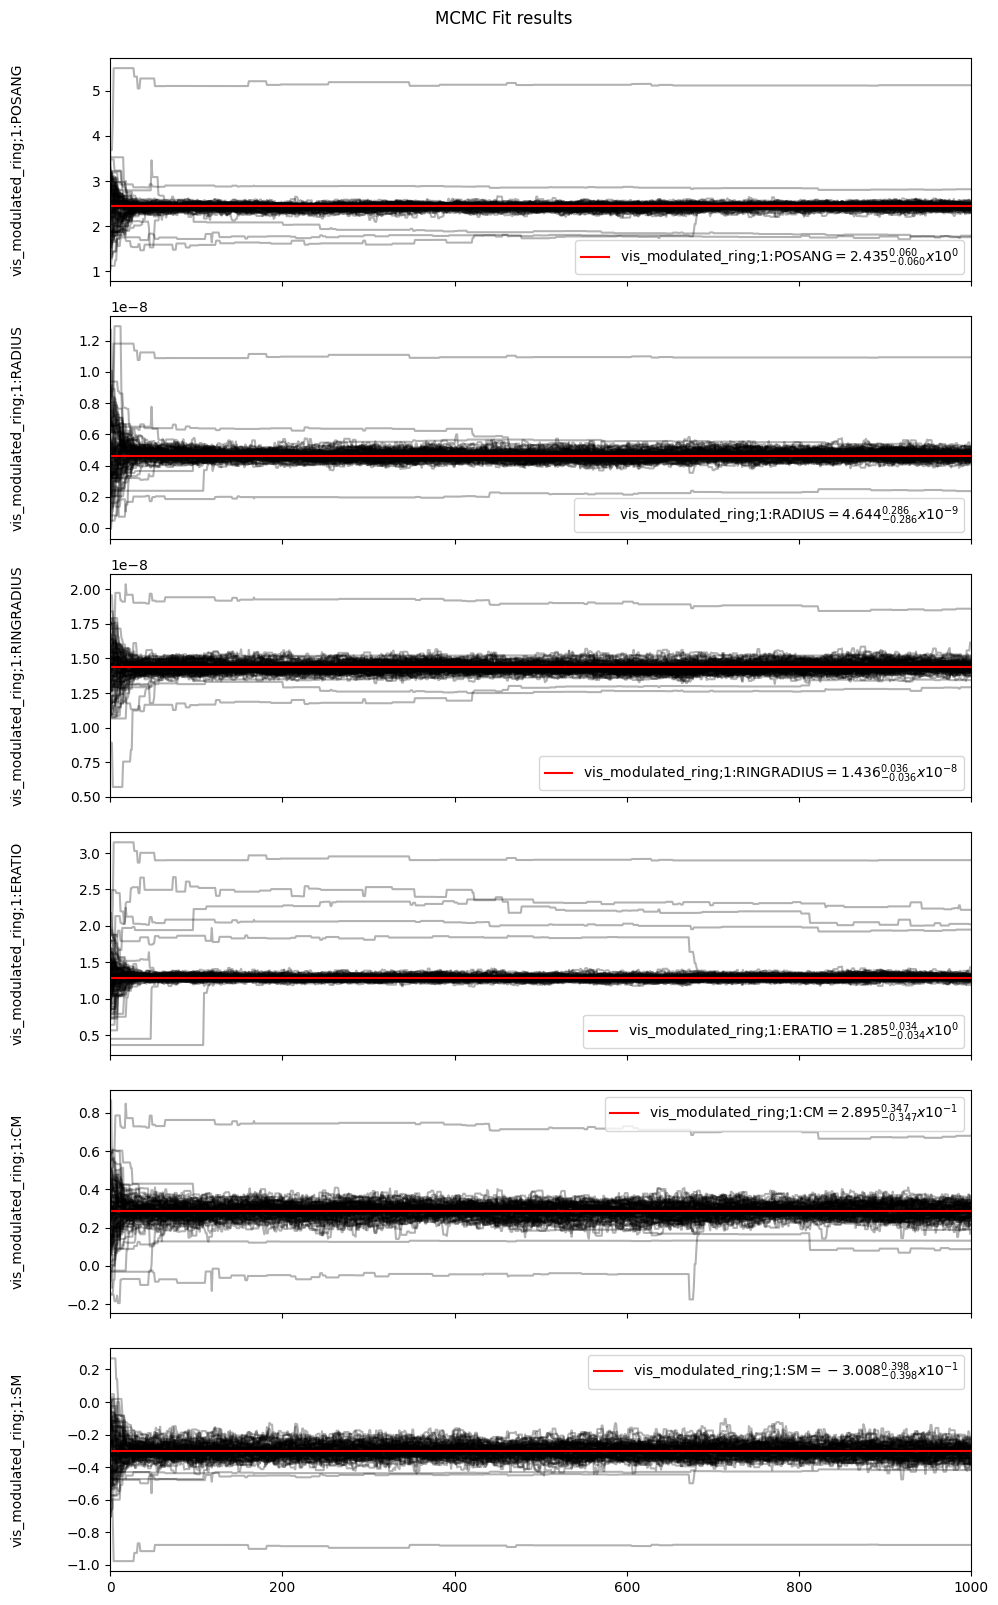

In [9]:
opiplot.fitReport('.', noisydata, sampler, mcmodel, keys)

In [10]:
print(mcmodel.params)
print(model.params)

{'vis_modulated_ring;1:POSANG': 2.4295047815000426, 'vis_modulated_ring;1:FLUX': 0.8, 'vis_modulated_ring;1:OFX': 0.0, 'vis_modulated_ring;1:OFY': 0.0, 'vis_modulated_ring;1:RADIUS': 4.5884890450989944e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4273842954014349e-08, 'vis_modulated_ring;1:ERATIO': 1.2820508818657432, 'vis_modulated_ring;1:FLOR': 0.5, 'vis_modulated_ring;1:MOD': 1, 'vis_modulated_ring;1:CM': [0.258186415732324], 'vis_modulated_ring;1:SM': [-0.34843883270592985], 'vis_modulated_ring;1:SPI': 1.6283574376766428, 'vis_point_source;1:FLUX': 0.2, 'vis_point_source;1:OFX': 9.696273622190721e-11, 'vis_point_source;1:OFY': 0.5, 'vis_point_source;1:SPI': -1.5}
{'vis_modulated_ring;1:POSANG': 2.4295047815000426, 'vis_modulated_ring;1:FLUX': 0.8, 'vis_modulated_ring;1:OFX': 0.0, 'vis_modulated_ring;1:OFY': 0.0, 'vis_modulated_ring;1:RADIUS': 4.5884890450989944e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4273842954014349e-08, 'vis_modulated_ring;1:ERATIO': 1.2820508818657432, 'vis_modul